# Visualisation of the kernels from the sklearn library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process import GaussianProcessRegressor

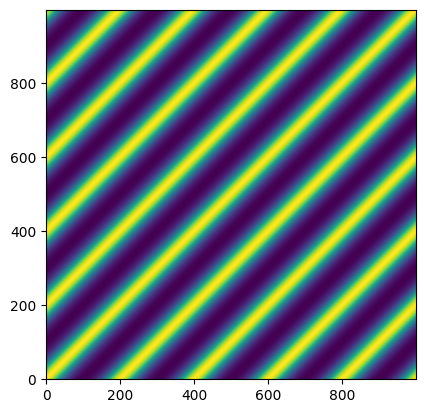

In [112]:
shift = 0

k_const = ConstantKernel(constant_value=-10e-6)

k_wn = WhiteKernel(noise_level=0.5**2)

k_dp = DotProduct(sigma_0=1.)

k_rbf = RBF(length_scale=100.0)

k_rq = RationalQuadratic(length_scale=100.0, alpha=1.)

k_m = Matern(length_scale=1.0, nu=1.5)

k_p = ExpSineSquared(length_scale=1.0, periodicity=200)

kernel = k_p

x = np.arange(0, 1000, 1).reshape(-1, 1)
plt.imshow(kernel(x, x), origin='lower', cmap='viridis')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


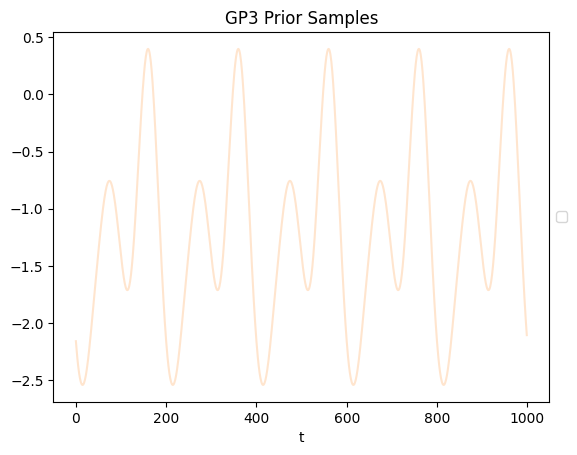

In [113]:
gpr = GaussianProcessRegressor(
    kernel=kernel, 
    n_restarts_optimizer=10, 
    normalize_y=False,
    alpha=0.0
)

x_train = np.arange(0, 1000, 1).reshape(-1, 1)
gp3_prior_samples = gpr.sample_y(X=x_train, n_samples=1)

fig, ax = plt.subplots()
for i in range(1):
    sns.lineplot(x=x_train[...,0], y = gp3_prior_samples[:, i], color="tab:orange", alpha=0.2, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='GP3 Prior Samples', xlabel='t');